# 230411100094_SILVIA RENATA SUWANDI

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

# Pemahaman Data ( data understanding)

In [7]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# 1. PENGAMBILAN DAN PEMAHAMAN DATA
# Fetch dataset
cirrhosis = fetch_ucirepo(id=878)

# Data
X = cirrhosis.data.features
y = cirrhosis.data.targets

# Menampilkan metadata dan variabel
print("Metadata:\n", cirrhosis.metadata)
print("\nInformasi Variabel:\n", cirrhosis.variables)

# Tinjau data awal
print("\n5 Baris Pertama Data:\n", X.head())
print("\nTarget:\n", y.head())

# Informasi data
print("\nInfo Data:\n")
print(X.info())

# Cek nilai yang hilang
print("\nMissing Values per Kolom:\n", X.isnull().sum())

# Statistik deskriptif
print("\nDeskripsi Statistik:\n", X.describe(include='all'))

Metadata:
 {'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 

#### Dataset sirosis hati dari UCI dipisah menjadi fitur (X) dan target (y), lalu diperiksa struktur data, tipe kolom, data hilang, dan statistik deskriptif untuk memahami isi data sebelum preprocessing dan pelatihan model.

 5 Data Teratas:
              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage Status  
0         12.2    4.0     

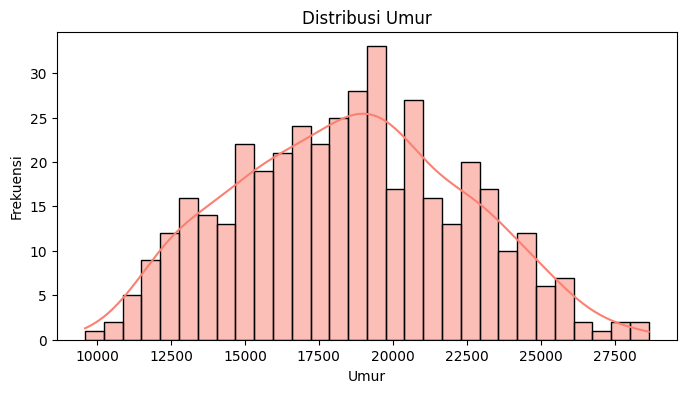

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


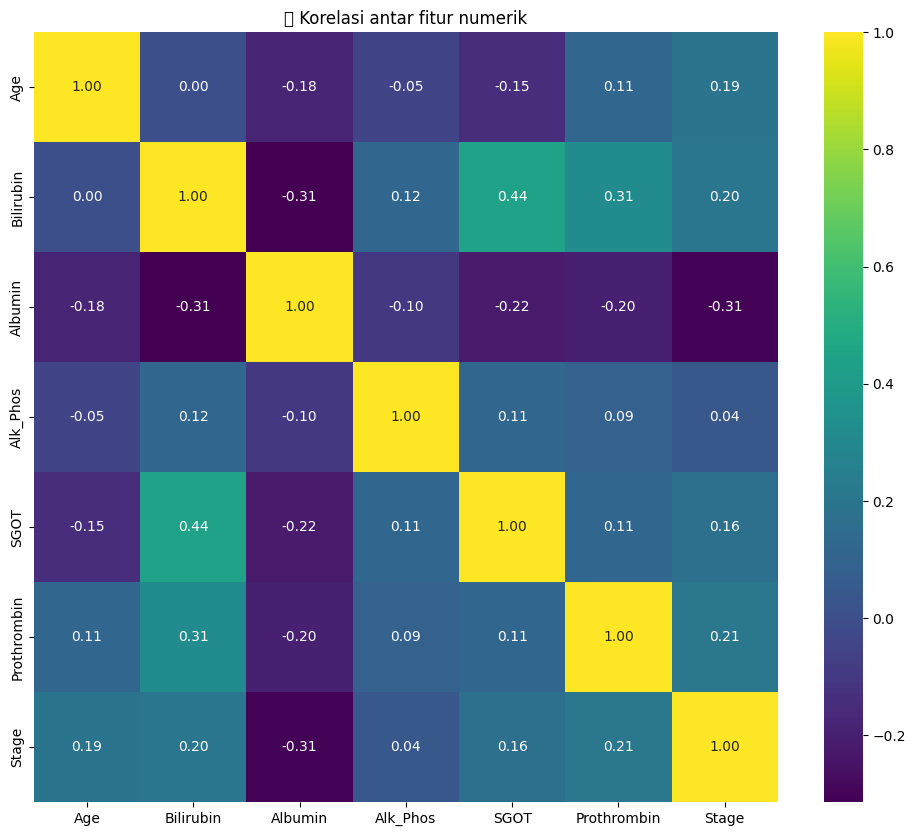

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan fitur dan target agar mudah dianalisis bersama
df = pd.concat([X, y], axis=1)

# 1. Tampilkan data teratas
print(" 5 Data Teratas:")
print(df.head())


# 2. Distribusi kategori (jika ada kolom kategorikal)
kategori_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in kategori_cols:
    print(f"\n Distribusi nilai pada kolom '{col}':")
    print(df[col].value_counts())

# 3. Visualisasi distribusi umur (jika ada)
if 'Age' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Age'], bins=30, kde=True, color='salmon')
    plt.title('Distribusi Umur')
    plt.xlabel('Umur')
    plt.ylabel('Frekuensi')
    plt.show()

# 4. Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("📊 Korelasi antar fitur numerik")
plt.show()

In [9]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ==============================
# 1. PENGAMBILAN DAN PEMAHAMAN DATA
# ==============================
# Fetch dataset
cirrhosis = fetch_ucirepo(id=878)

# Data
X = cirrhosis.data.features
y = cirrhosis.data.targets

# ==============================
# 2. PREPROCESSING
# ==============================
# Pisahkan kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Imputasi numerik
num_imputer = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)

# Imputasi kategorikal
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(cat_imputer.fit_transform(X[cat_cols]), columns=cat_cols)

# Gabungkan kembali
X_clean = pd.concat([X_num, X_cat], axis=1)

# Encoding kolom kategorikal
X_encoded = pd.get_dummies(X_clean)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ==============================
# 3. PEMODELAN
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ==============================
# 4. EVALUASI
# ==============================
y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAkurasi Model: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Confusion Matrix:
 [[37  0  7]
 [ 1  0  3]
 [10  0 26]]

Classification Report:
               precision    recall  f1-score   support

           C       0.77      0.84      0.80        44
          CL       0.00      0.00      0.00         4
           D       0.72      0.72      0.72        36

    accuracy                           0.75        84
   macro avg       0.50      0.52      0.51        84
weighted avg       0.71      0.75      0.73        84


Akurasi Model: 75.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# EVALUASI

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=42)  # Kamu juga bisa ganti kernel='linear' atau 'poly' sesuai kebutuhan
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nEvaluasi Model SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=0))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluasi Model SVM:
Accuracy: 0.5952380952380952
Classification Report:
               precision    recall  f1-score   support

           C       0.56      1.00      0.72        44
          CL       0.00      0.00      0.00         4
           D       1.00      0.17      0.29        36

    accuracy                           0.60        84
   macro avg       0.52      0.39      0.34        84
weighted avg       0.72      0.60      0.50        84

